In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Image Augmentation

<ol>1. Loading and pre-processing the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Augmenting Images</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance</ol>

## 1. Loading and pre-processing the dataset

In [4]:
!pip install pandas numpy scikit-image tqdm matplotlib scikit-learn


In [5]:
# importing the libraries
import pandas as pd
import numpy as np
from skimage.io import imread
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# libraries for performing image augmentation tasks
from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage.transform import AffineTransform, warp

In [6]:
import zipfile
import os

# Path to your zip file
zip_path = 'NN.zip'
extract_to = 'unzipped_folder/'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Extracted to: {extract_to}")

Extracted to: unzipped_folder/


In [7]:
import zipfile
import os

# Path to your zip file
zip_path = 'unzipped_folder/Neuralnetworkandhyperparametertuninginkeras-200330-192024/Neural network and hyperparameter tuning in keras/Dataset.zip'
extract_to = 'Dataset/'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Extracted to: {extract_to}")

Extracted to: Dataset/


In [8]:
# reading the csv file
data = pd.read_csv('Dataset/Dataset/emergency_classification.csv')

In [17]:
# create random number generator
seed = 42

In [23]:
X = []
for img_name in data.image_names:
    img_path = os.path.join('Dataset/Dataset/images', img_name)
    try:
        img = plt.imread(img_path)
        img = img / 255.0
        X.append(img)
    except FileNotFoundError:
        print(f"Missing: {img_path}")
X = np.array(X)
y = data.emergency_or_not.values


In [25]:
# shape of original dataset
X.shape, y.shape

((2352, 224, 224, 3), (2352,))

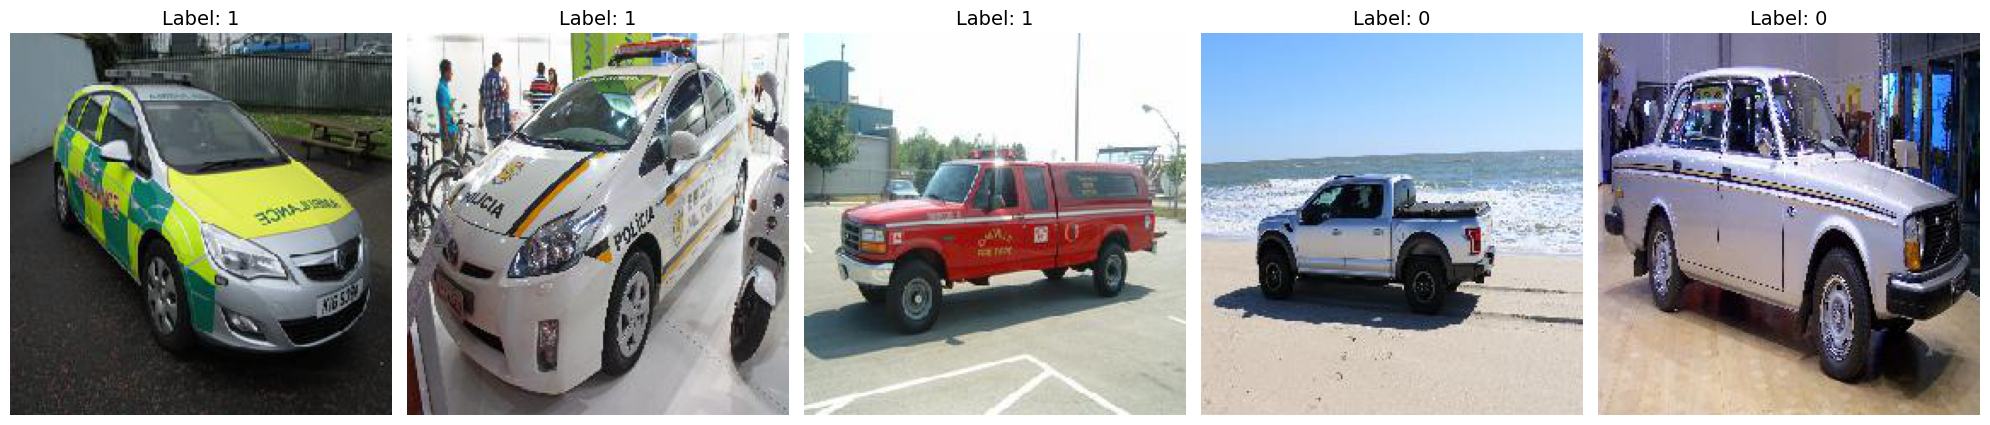

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i in range(5):
    idx = i * 400
    ax[i].imshow(X[idx])
    ax[i].axis('off')
    ax[i].set_title(f"Label: {y[idx]}", fontsize=14)

plt.tight_layout()
plt.show()

## 2. Creating training and validation set

In [29]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [31]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 224, 224, 3), (1646,)), ((706, 224, 224, 3), (706,)))

## 3. Augmenting Images

In [33]:
# augmenting the training images
final_train_data = []
final_target_train = []
for i in tqdm(range(X_train.shape[0])):
    # original image
    final_train_data.append(X_train[i])
    # image rotation
    final_train_data.append(rotate(X_train[i], angle=30, mode = 'edge'))
    # image flipping (left-to-right)    
    final_train_data.append(np.fliplr(X_train[i]))
    # image flipping (up-down) 
    final_train_data.append(np.flipud(X_train[i]))
    # image noising
    final_train_data.append(random_noise(X_train[i],var=0.2))
    for j in range(5):
        final_target_train.append(y_train[i])

100%|█████████████████████████████████████████████████████████████████████████████| 1646/1646 [00:09<00:00, 172.16it/s]


In [35]:
# converting images and target to array
final_train = np.array(final_train_data)
final_target_train = np.array(final_target_train)

In [36]:
# shape of new training set
final_train.shape, final_target_train.shape 

((8230, 224, 224, 3), (8230,))

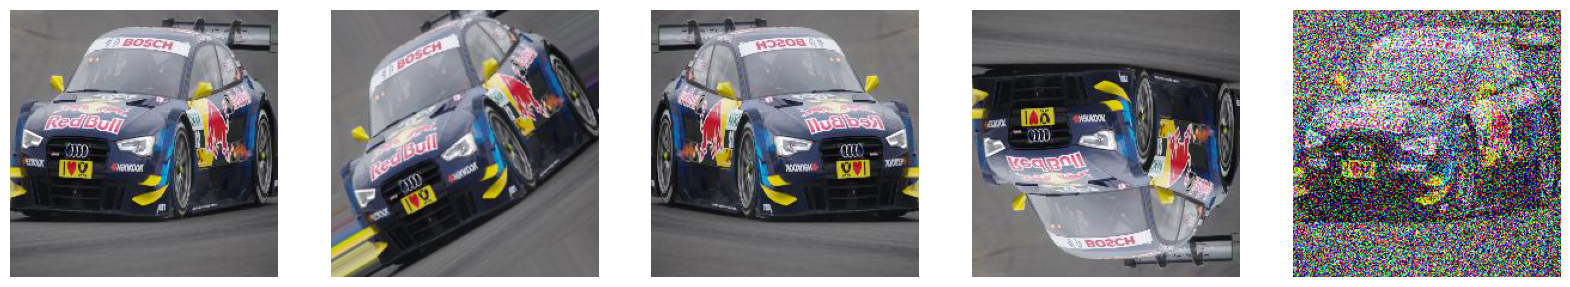

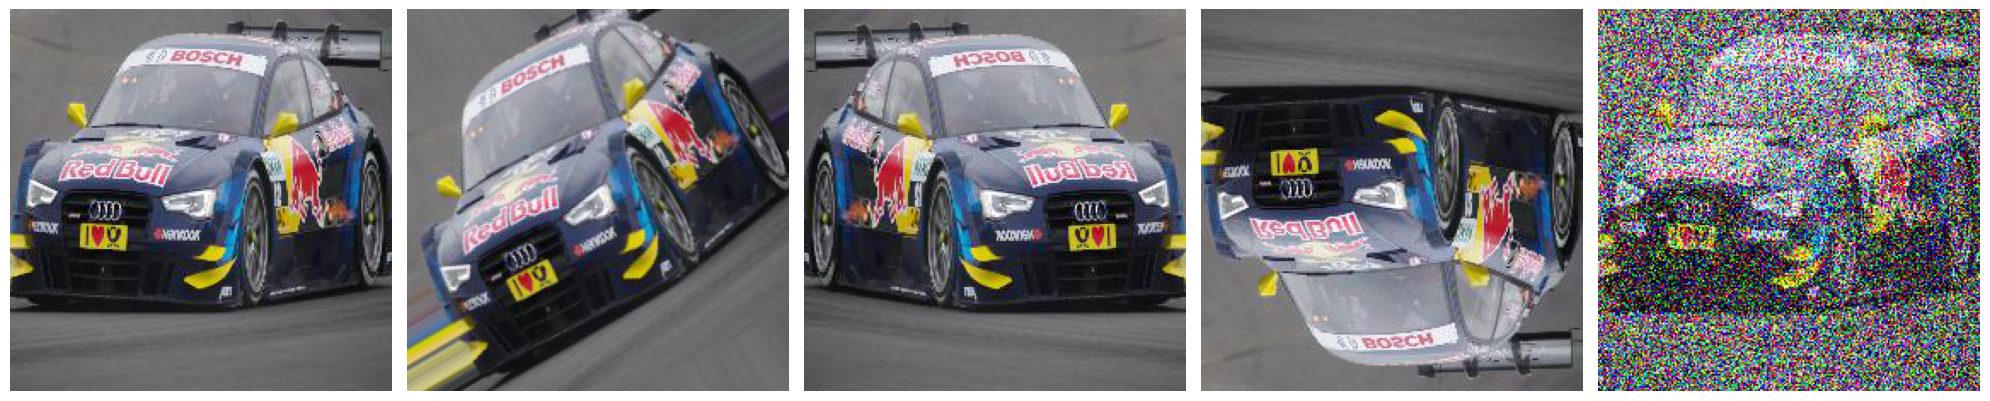

In [41]:
# visualizing the augmented images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(final_train[i+30])
    ax[i].axis('off')

plt.tight_layout()
plt.show()

In [43]:
# converting 3 dimensional image to 1 dimensional image
final_train = final_train.reshape(final_train.shape[0], 224*224*3)
final_train.shape

(8230, 150528)

In [44]:
# minimum and maximum pixel values of training images
final_train.min(), final_train.max()

(0.0, 1.0)

In [47]:
# converting 3 dimensional validation image to 1 dimensional image
final_valid = X_valid.reshape(X_valid.shape[0], 224*224*3)
final_valid.shape

(706, 150528)

In [48]:
# minimum and maximum pixel values of validation images
final_valid.min(), final_valid.max()

(0.0, 1.0)

## 4. Defining the model architecture

In [51]:
# importing functions from keras to define the neural network architecture
from keras.layers import Dense, InputLayer, Dropout, BatchNormalization
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

In [56]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [57]:
# defining and compiling the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [60]:
# summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,063,901 (57.46 MB)

 Trainable params: 15,063,501 (57.46 MB)

 Non-trainable params: 400 (1.56 KB)

## 5. Training the model

In [62]:
# training the model
model_history = model.fit(final_train, final_target_train, epochs=50, batch_size=128,validation_data=(final_valid,y_valid))

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.5824 - loss: 0.9422 - val_accuracy: 0.4391 - val_loss: 0.7966
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.6278 - loss: 0.8116 - val_accuracy: 0.4391 - val_loss: 0.7432
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.6614 - loss: 0.7471 - val_accuracy: 0.5170 - val_loss: 0.6863
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.6792 - loss: 0.7014 - val_accuracy: 0.6898 - val_loss: 0.5954
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.7111 - loss: 0.6452 - val_accuracy: 0.7195 - val_loss: 0.5660
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.7209 - loss: 0.6168 - val_accuracy: 0.6870 - val_loss: 0.5821
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.7301 - loss: 0.6143 - val_accuracy: 0.7295 - val_loss: 0.5342
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.7501 - loss: 0.5801 - val_accuracy: 0.715

## 6. Evaluating model performance

In [66]:
from sklearn.metrics import accuracy_score

# Predict probabilities
y_probs = model.predict(final_valid)

# Convert probabilities to class labels (threshold 0.5)
y_preds = (y_probs > 0.5).astype("int")

# Calculate accuracy
print("Accuracy on validation set:", accuracy_score(y_valid, y_preds) * 100, "%")


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy on validation set: 71.81303116147308 %


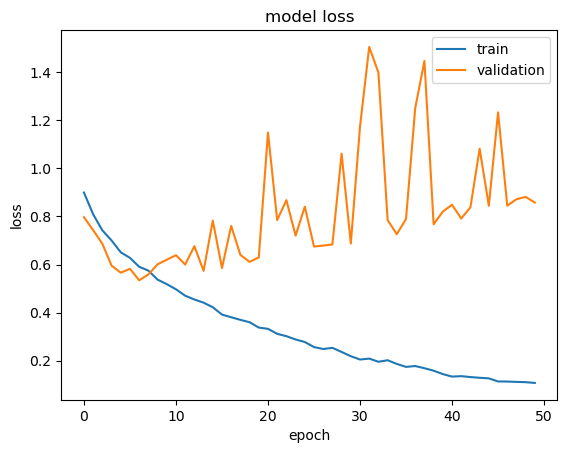

In [68]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()# Summarize model accuracy over epochs
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


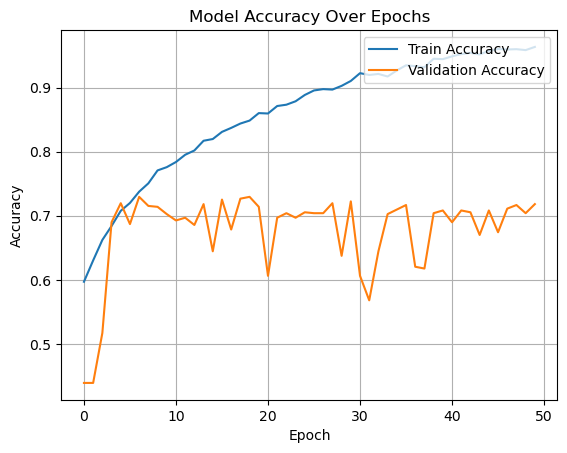

In [72]:
# Summarize model accuracy over epochs
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
